In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,r2_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate

In [183]:
df_Customer = pd.read_csv('customer_churn.csv')

In [184]:
df_Customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [185]:
df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [186]:
#Total charges has dtype object it has to be numeric
df_Customer['TotalCharges'] = pd.to_numeric(df_Customer['TotalCharges'],errors ='coerce' )

In [187]:
df_Customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [188]:
# values in Total Charges are close to product of tenure and monthly charges
#so we can drop or fill the values as we can calculate  close approx values

df_Customer['TotalCharges'] = df_Customer['TotalCharges'].fillna(df_Customer['tenure']*df_Customer['MonthlyCharges'])
df_Customer.isnull().sum().sum()

0

In [189]:
df_Customer.describe()
# looking at min max and std it's clear that we need to scale the data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Tasks To Be Performed:

1. Data Manipulation:


In [190]:
#● Extract the 5th column and store it in ‘customer_5’
customer_5 = df_Customer.iloc[:,4:5]
customer_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [191]:
#● Extract the 15th column and store it in ‘customer_15’
customer_15 = df_Customer.iloc[:,14:15]
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


In [192]:
#Extract all the male senior citizens whose payment method is electronic
#check and store the result in ‘senior_male_electronic’
filt1 = ((df_Customer['gender']=='Male') & (df_Customer['SeniorCitizen']==1) & (df_Customer['PaymentMethod']=='Electronic check'))
senior_male_electronic = df_Customer[filt1].reset_index(drop = True)
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
1,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
2,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
3,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
4,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No


In [193]:
# Extract all those customers whose tenure is greater than 70 months or
#their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
filt = ((df_Customer['tenure']>70) | (df_Customer['MonthlyCharges']>100))
customer_total_tenure = df_Customer[filt].reset_index(drop = True)
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
1,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
2,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
3,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
4,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [194]:
#Extract all the customers whose contract is of two years, payment method
#is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

filt = ((df_Customer['Contract']=='Two year') & (df_Customer['Churn']=='Yes'))
two_mail_yes = df_Customer[filt].reset_index(drop = True)
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
1,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
2,6680-NENYN,Female,0,No,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,104.60,4759.85,Yes
3,4853-RULSV,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15,Yes
4,2834-JRTUA,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,108.05,7532.15,Yes


In [195]:
# Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
customer_333 = df_Customer.sample(333,random_state=2)# taken a random state so the we get the same rows each time we run it.
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5806,7854-EKTJL,Female,0,No,Yes,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.60,35.85,Yes
3678,6473-ULUHT,Male,0,Yes,Yes,16,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,84.90,1398.25,No
4060,0757-WCUUZ,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,No,No,Yes,Two year,No,Credit card (automatic),63.35,3409.10,No
1577,9254-RBFON,Female,0,Yes,Yes,17,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,Yes
5007,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,6507-DTJZV,Male,0,No,Yes,13,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),66.40,831.75,No
2548,9796-BPKIW,Male,1,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.95,562.70,No
6513,1794-SWWKL,Male,0,Yes,Yes,15,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),59.65,867.10,No
3519,5019-GQVCR,Male,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,3645.60,No


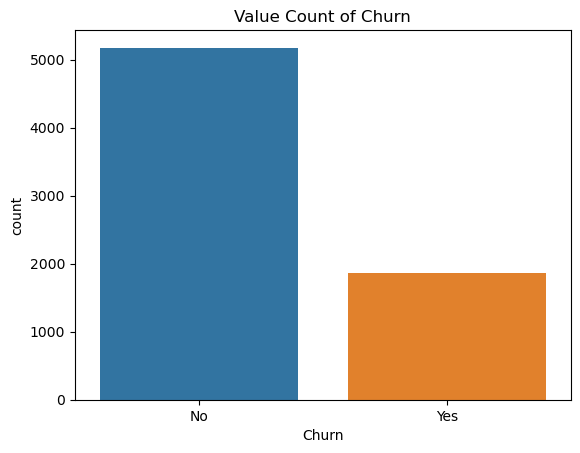

No     5174
Yes    1869
Name: Churn, dtype: int64

In [196]:
#Get the count of different levels from the ‘Churn’ column

sns.countplot(df_Customer,x='Churn')
plt.title('Value Count of Churn')
plt.show()
df_Customer['Churn'].value_counts()#shows imbalance hence we need to apply smote or balancedbagging

# Data Visualization:


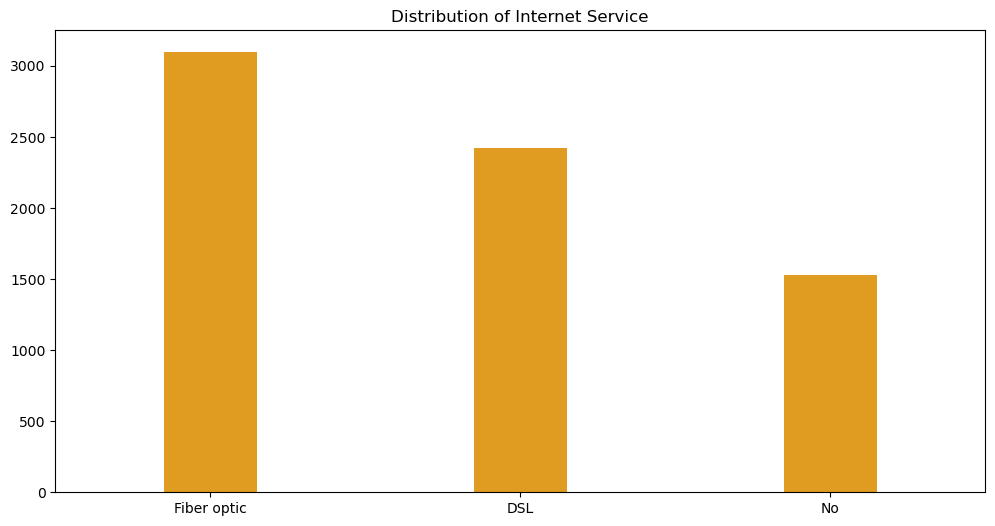

In [197]:
#Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange

data = df_Customer['InternetService'].value_counts()
plt.figure(figsize= (12,6))
sns.barplot(x=data.index,y=data.values,width=0.3,color = 'orange')
plt.title('Distribution of Internet Service')
plt.show()

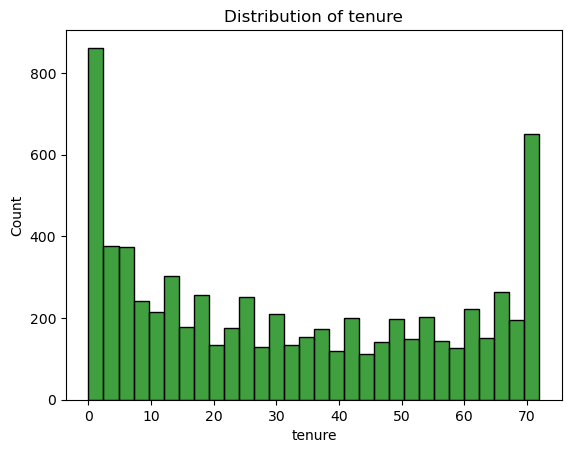

In [198]:
#Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure

sns.histplot(data = df_Customer,x='tenure',bins=30,color = 'green')
plt.title("Distribution of tenure")
plt.show()

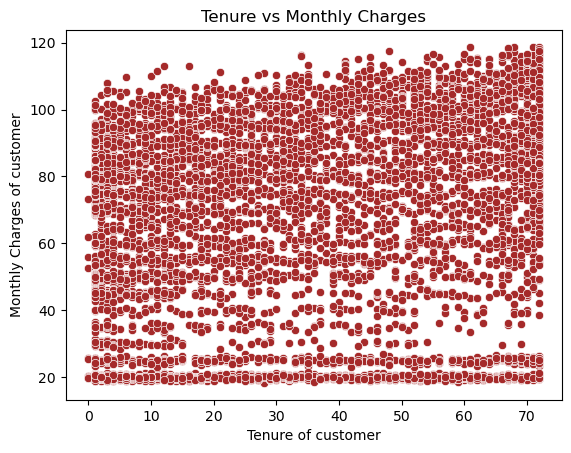

In [199]:
# Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’.
#Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#a. Assign the points a color of ‘brown’
#b. Set the x-axis label to ‘Tenure of customer’
#c. Set the y-axis label to ‘Monthly Charges of customer’
#d. Set the title to ‘Tenure vs Monthly Charges’

sns.scatterplot(data = df_Customer,x = 'tenure' ,y='MonthlyCharges',color = 'brown' )
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

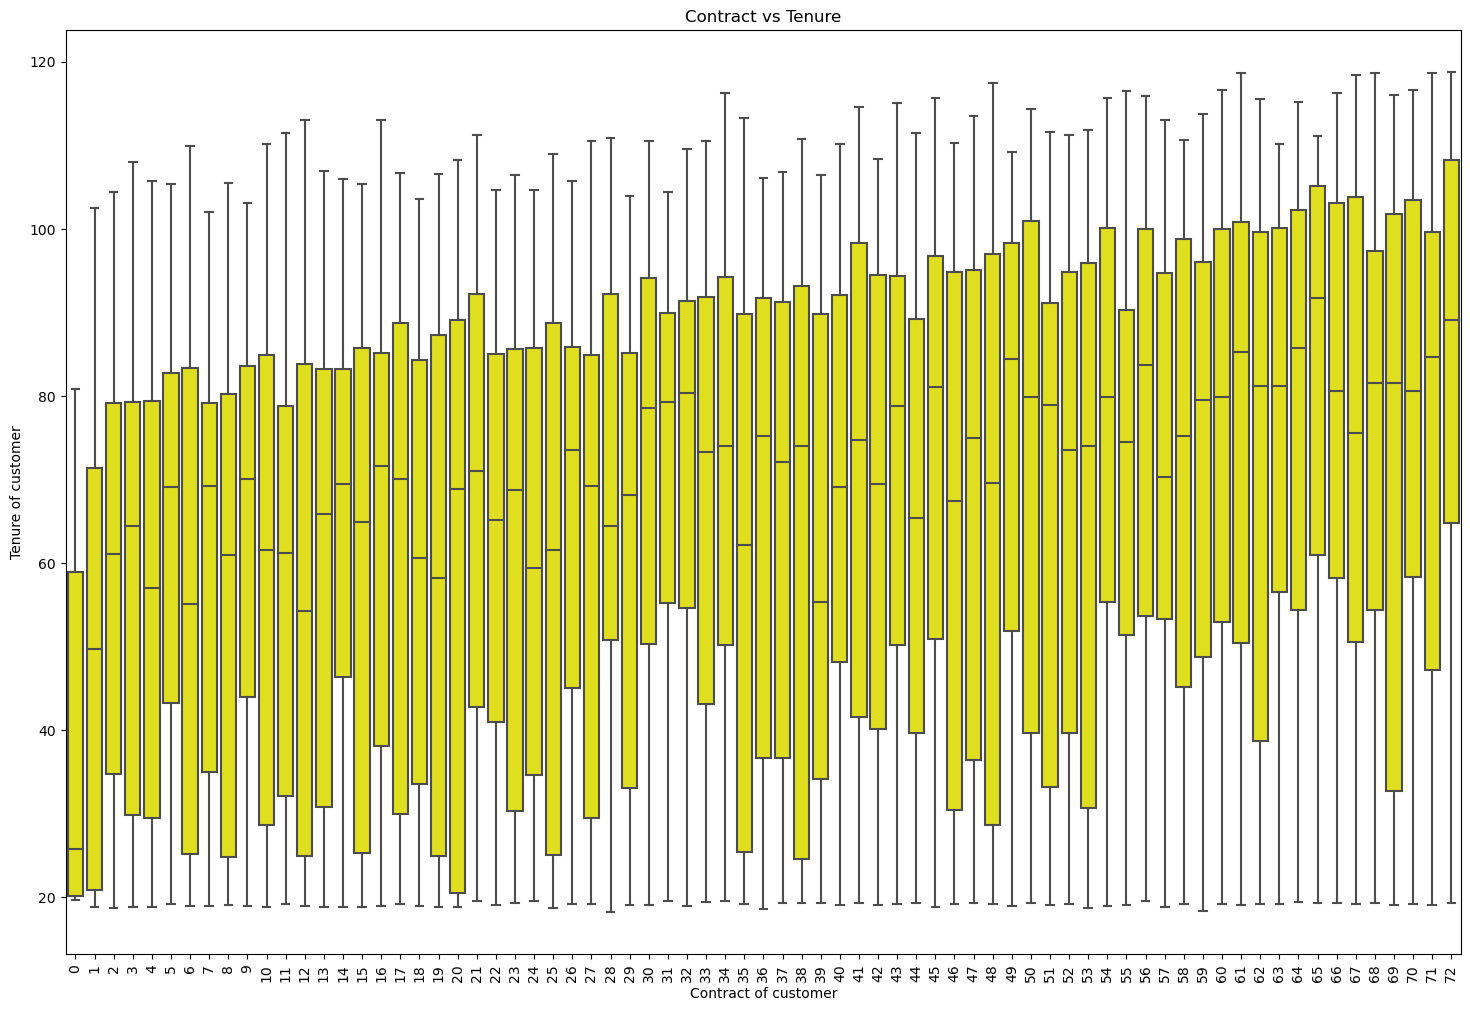

In [200]:
#Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.
plt.figure(figsize=(18,12))
sns.boxplot(data = df_Customer,x = 'tenure' ,y='MonthlyCharges',color = 'yellow' )
plt.ylabel('Tenure of customer')
plt.xlabel('Contract of customer',)
plt.xticks(rotation  = 90)
plt.title('Contract vs Tenure')
plt.show()



In [277]:
# apply lable-encoder on Churn as we are going to use it in a number of places
lc = LabelEncoder()
df_Customer['Churn'] = lc.fit_transform(df_Customer['Churn'])

# LINEAR MODEL

In [ ]:
#Build a linear model where dependent variable is ‘MonthlyCharges’
# independent variable is ‘tenure’:
#a. Divide the dataset into train and test sets in 70:30 ratio.
#b. Build the model on train set and predict the values on test set
#c. After predicting the values, find the root mean square error
#d. Find out the error in prediction & store the result in ‘error’
#e. Find the root mean square erro

In [278]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [279]:
columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges','Churn']

In [280]:
df_lr = df_Customer.drop(columns =columns)

In [281]:
df_lr.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


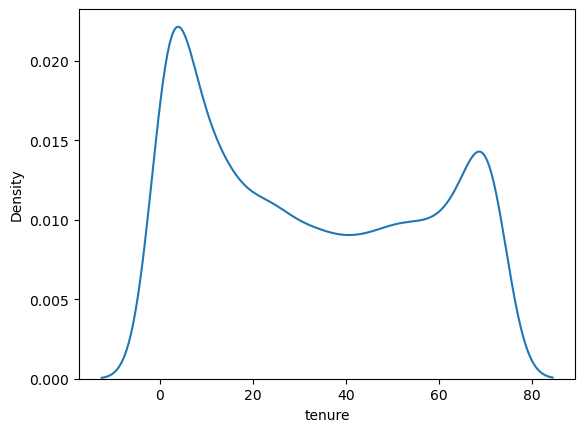

In [282]:
#Checking for distribution of tenure

sns.kdeplot(data = df_lr,x = 'tenure')#its bimodal
plt.show()

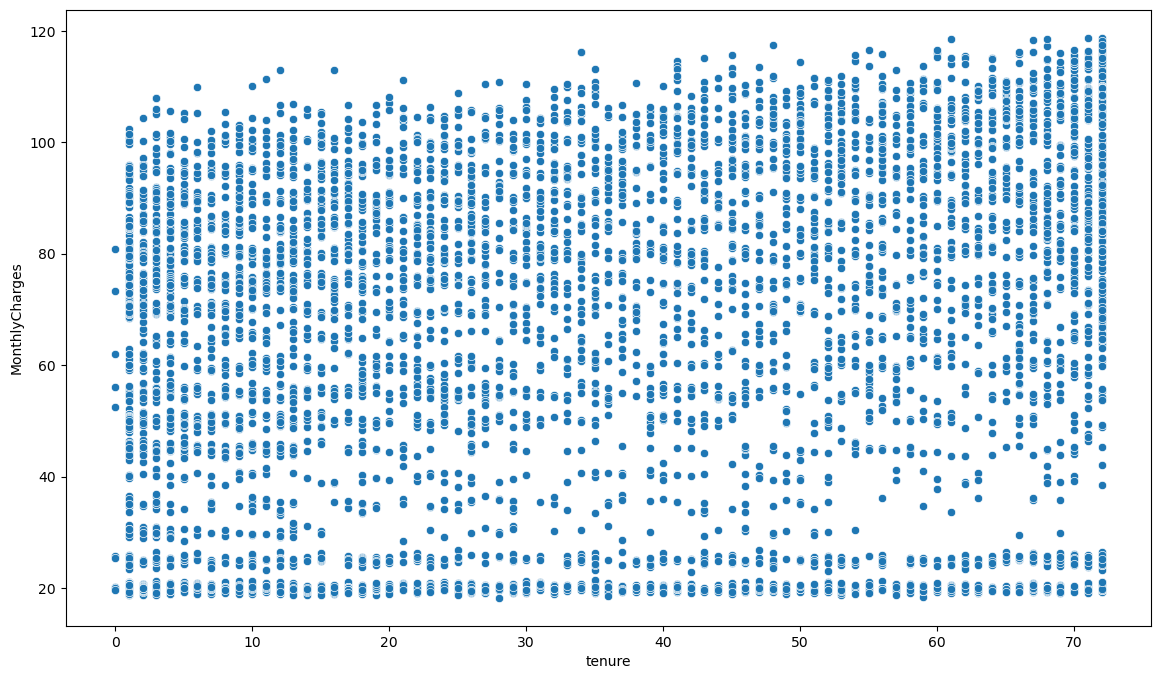

In [283]:
#check how is Monthly charges related to Churn

plt.figure(figsize=(14,8))
sns.scatterplot(data = df_lr,x='tenure',y='MonthlyCharges')
plt.show()
#looking at the scatter plot we can say Linear model wont we a great fit here

In [284]:
lst = list(df_lr.columns)
lst.remove('MonthlyCharges')
X = df_lr[lst]
y = df_lr['MonthlyCharges']

In [285]:
transformers = [('scaling',StandardScaler(),['tenure']),
                ('log', FunctionTransformer(np.log1p),['tenure'])]

In [286]:
columnTranformer = ColumnTransformer(transformers,remainder='passthrough')

In [287]:
#As its a singel feature we apply transformation before split else we should always apply transformations after split
X = columnTranformer.fit_transform(X)

In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [289]:
lr = LinearRegression()

In [290]:
lr.fit(X_train,y_train)

LinearRegression()

In [291]:
y_train_predict = lr.predict(X_train)

In [292]:
r2_score(y_train,y_train_predict)

0.05901209893529069

In [293]:
y_test_predict = lr.predict(X_test)

In [294]:
r2_score(y_test,y_test_predict)

0.0701494248104152

In [295]:
#Predicting errors
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [296]:
y_test_mae = mean_absolute_error(y_test,y_test_predict)
y_test_mse = mean_squared_error(y_test,y_test_predict)

In [297]:
df_error = pd.DataFrame()

In [298]:
df_error['actual'] = y_test
df_error['predicted'] = y_test_predict
df_error['mae'] = y_test_mae
df_error['mse'] = y_test_mse
df_error.reset_index(drop = True,inplace = True)
df_error.head()

,actual,predicted,mae,mse
0,50.80,57.052365,25.493492,858.90937
1,78.80,62.375292,25.493492,858.90937
2,80.40,69.284961,25.493492,858.90937
3,83.80,54.245905,25.493492,858.90937
4,25.15,64.954626,25.493492,858.90937


# LOGISTIC REGRESSION

In [299]:
#Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
#a. Divide the dataset in 65:35 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and get the accuracy score

In [300]:
columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges']

In [386]:
df_log = df_Customer.drop(columns = columns)

In [387]:
df_log.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,0
1,34,56.95,0
2,2,53.85,1
3,45,42.30,0
4,2,70.70,1


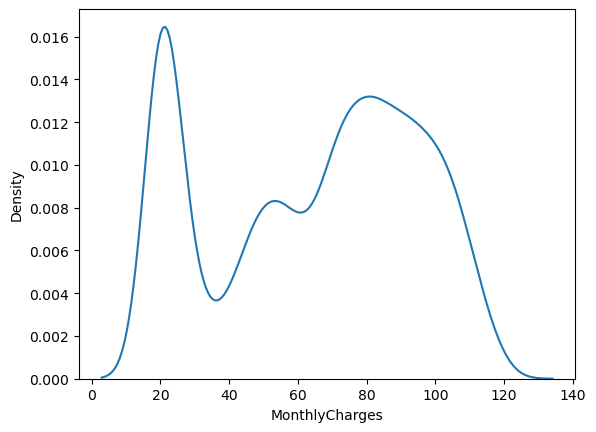

In [303]:
#Checking for distribution of Monthly Charges

sns.kdeplot(data = df_lr,x = 'MonthlyCharges')#its bimodal
plt.show()

In [305]:
lst = list(df_log.columns)
lst.remove('Churn')
X_log = df_log[lst]
y_log = df_log['Churn']

In [306]:
feature = ['MonthlyCharges']
skip = ['Churn']

In [307]:
# WE will apply power tranformer to make the distribution more like gaussian 
# WE can try Function Transformer also and check which gives better results
transformer = [('scale',StandardScaler(),feature),
               ('power',PowerTransformer(),feature)]


In [308]:
columtransformer_log = ColumnTransformer(transformer,remainder='passthrough')

In [309]:
X_log = columtransformer_log.fit_transform(X_log)

In [310]:
X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,test_size=0.35,random_state= 6)

In [311]:
# We will have to deal with imbalance data with Smote
# WE can select baggingBalanced Classifier also

from imblearn.over_sampling import SMOTE

In [312]:
sm = SMOTE(random_state=10)
X_train_log_resample,y_train_log_resample = sm.fit_resample(X_train_log,y_train_log)

In [313]:
log = LogisticRegression()

In [314]:
log.fit(X_train_log_resample,y_train_log_resample)

LogisticRegression()

In [315]:
y_test_log_pred = log.predict(X_test_log)
y_train_log_pred = log.predict(X_train_log_resample)

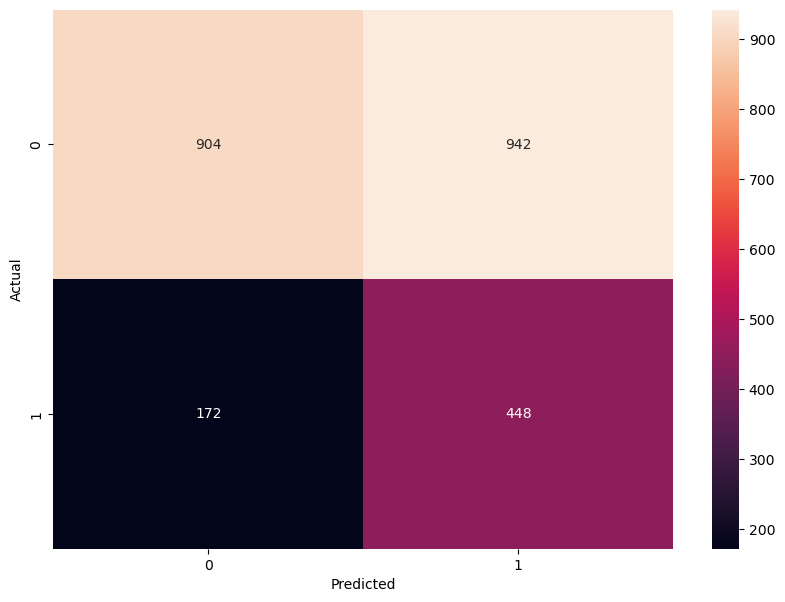

In [316]:
#Confusion Matrix
cm = confusion_matrix(y_test_log,y_test_log_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [317]:
#AS it was an imbalance dataset we should refer to f1-score 
print(classification_report(y_test_log,y_test_log_pred))

              precision    recall  f1-score   support

           0       0.84      0.49      0.62      1846
           1       0.32      0.72      0.45       620

    accuracy                           0.55      2466
   macro avg       0.58      0.61      0.53      2466
weighted avg       0.71      0.55      0.58      2466



In [318]:
print(classification_report(y_train_log_resample,y_train_log_pred))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56      3328
           1       0.59      0.71      0.64      3328

    accuracy                           0.60      6656
   macro avg       0.61      0.60      0.60      6656
weighted avg       0.61      0.60      0.60      6656



In [319]:
accuracy_score(y_test_log,y_test_log_pred)

0.5482562854825629

In [320]:
accuracy_score(y_train_log_resample,y_train_log_pred)

0.603515625

# LOGISTIC REGRESSION IN 80:20

In [363]:
#Build a multiple logistic regression model where dependent variable is ‘Churn’ 
#independent variables are ‘tenure’ and ‘MonthlyCharges’
#e. Divide the dataset in 80:20 ratio
#f. Build the model on train set and predict the values on test set
#g. Build the confusion matrix and get the accuracy score

In [364]:
columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges']

In [365]:
df_log_80 = df_Customer.drop(columns = columns)

In [366]:
df_log_80.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,0
1,34,56.95,0
2,2,53.85,1
3,45,42.30,0
4,2,70.70,1


In [367]:
lst = list(df_log_80.columns)
lst.remove('Churn')
X_log_80 = df_log_80[lst]
y_log_80 = df_log_80['Churn']

In [368]:
X_train_log_80,X_test_log_80,y_train_log_80,y_test_log_80 = train_test_split(X_log_80,y_log_80,test_size=.20,random_state=11)

In [369]:
features = ['tenure','MonthlyCharges']

In [370]:
# WE will apply scaling and Function tansformer

transformer_80 = [('scale',StandardScaler(),features),
                  ('function',FunctionTransformer(np.log1p),features)]

In [371]:
col_transform_80 = ColumnTransformer(transformer_80,remainder='passthrough')

In [372]:
X_train_log_80 = col_transform_80.fit_transform(X_train_log_80)
X_test_log_80 = col_transform_80.transform(X_test_log_80)

In [373]:
# handling data imbalance with baggingbalancer classifer

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [376]:
estimator = LogisticRegression()
bagging = BaggingClassifier(estimator=estimator, n_estimators=10, random_state=42)
bbc = BalancedBaggingClassifier(estimator=bagging)

In [377]:
bbc.fit(X_train_log_80,y_train_log_80)

BalancedBaggingClassifier(estimator=BaggingClassifier(estimator=LogisticRegression(),
                                                      random_state=42))

In [380]:
y_test_log_80_predict = bbc.predict(X_test_log_80)
accuracy_score(y_test_log_80,y_test_log_80_predict)

0.7416607523066004

In [381]:
y_train_log_80_predict = bbc.predict(X_train_log_80)
accuracy_score(y_train_log_80,y_train_log_80_predict)

0.7282570110046148

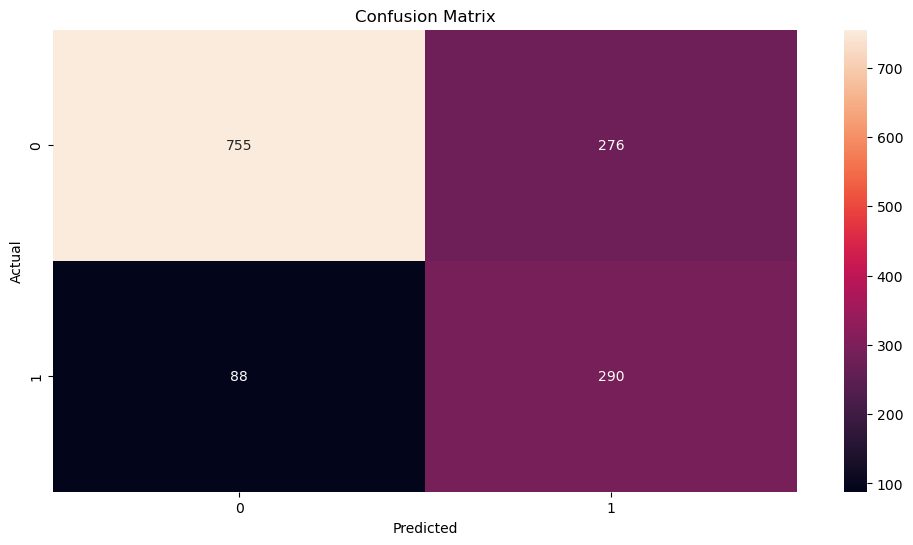

In [384]:
#Confusin Matrix
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_test_log_80,y_test_log_80_predict)
sns.heatmap(cm,annot=True,fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [385]:
#Classification Report
print(classification_report(y_test_log_80,y_test_log_80_predict))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1031
           1       0.51      0.77      0.61       378

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



# DECISSION TREE

In [ ]:
# Build a decision tree model where dependent variable is ‘Churn’ and
#independent variable is ‘tenure’:
#a. Divide the dataset in 80:20 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and calculate the accuracy

In [409]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [410]:
col = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [411]:
df_dt = df_Customer.drop(columns = col)

In [412]:
df_dt.head()

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1


In [413]:
lst = list(df_dt.columns)
lst.remove('Churn')
X_dt = df_dt[lst]
y_dt = df_dt['Churn']

In [417]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_dt,y_dt,test_size=.20,random_state=15)

In [420]:
#Handel imbalace data with balancebagging
dt = DecisionTreeClassifier()
bagging_dt = BaggingClassifier(estimator=dt)
bbc_dt = BalancedBaggingClassifier(estimator=bagging_dt)

In [421]:
bbc_dt.fit(X_train_dt,y_train_dt)

BalancedBaggingClassifier(estimator=BaggingClassifier(estimator=DecisionTreeClassifier()))

In [432]:
y_test_dt_predict_bbc = bbc_dt.predict(X_test_dt)

In [433]:
# classification report after treating imbalace data
print(classification_report(y_test_dt,y_test_dt_predict_bbc))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1023
           1       0.43      0.61      0.50       386

    accuracy                           0.67      1409
   macro avg       0.63      0.65      0.63      1409
weighted avg       0.72      0.67      0.68      1409



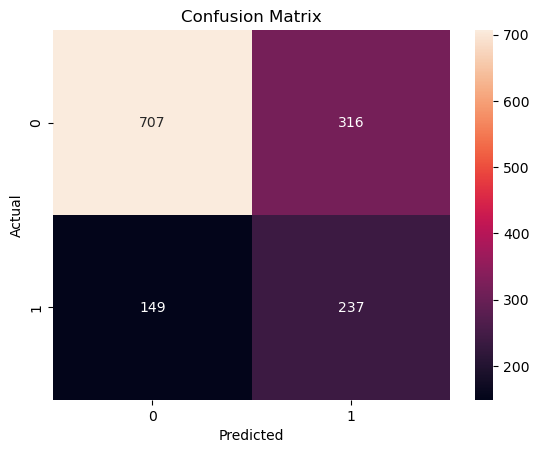

In [449]:
#confusion matrix
cm = confusion_matrix(y_test_dt,y_test_dt_predict_bbc)
sns.heatmap(cm,annot=True,fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [430]:
dt.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier()

In [434]:
y_test_dt_predict = dt.predict(X_test_dt)

In [436]:
# classification report without treating imbalace data
print(classification_report(y_test_dt,y_test_dt_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85      1023
           1       0.61      0.27      0.38       386

    accuracy                           0.75      1409
   macro avg       0.69      0.60      0.61      1409
weighted avg       0.73      0.75      0.72      1409



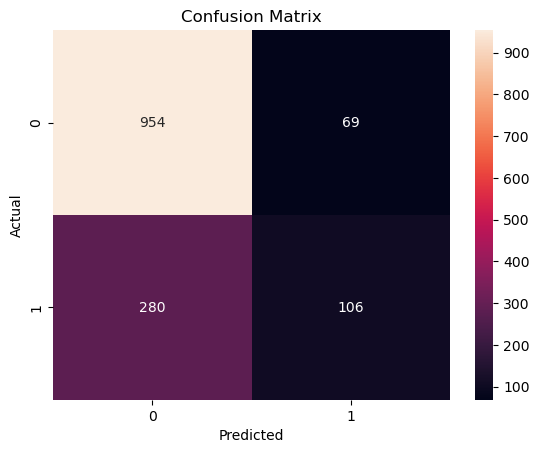

In [450]:
#confusion matrix
cm = confusion_matrix(y_test_dt,y_test_dt_predict)
sns.heatmap(cm,annot=True,fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [438]:
# We plot the tree as it gives a good idea for hyperparameter tunning
from sklearn.tree import plot_tree

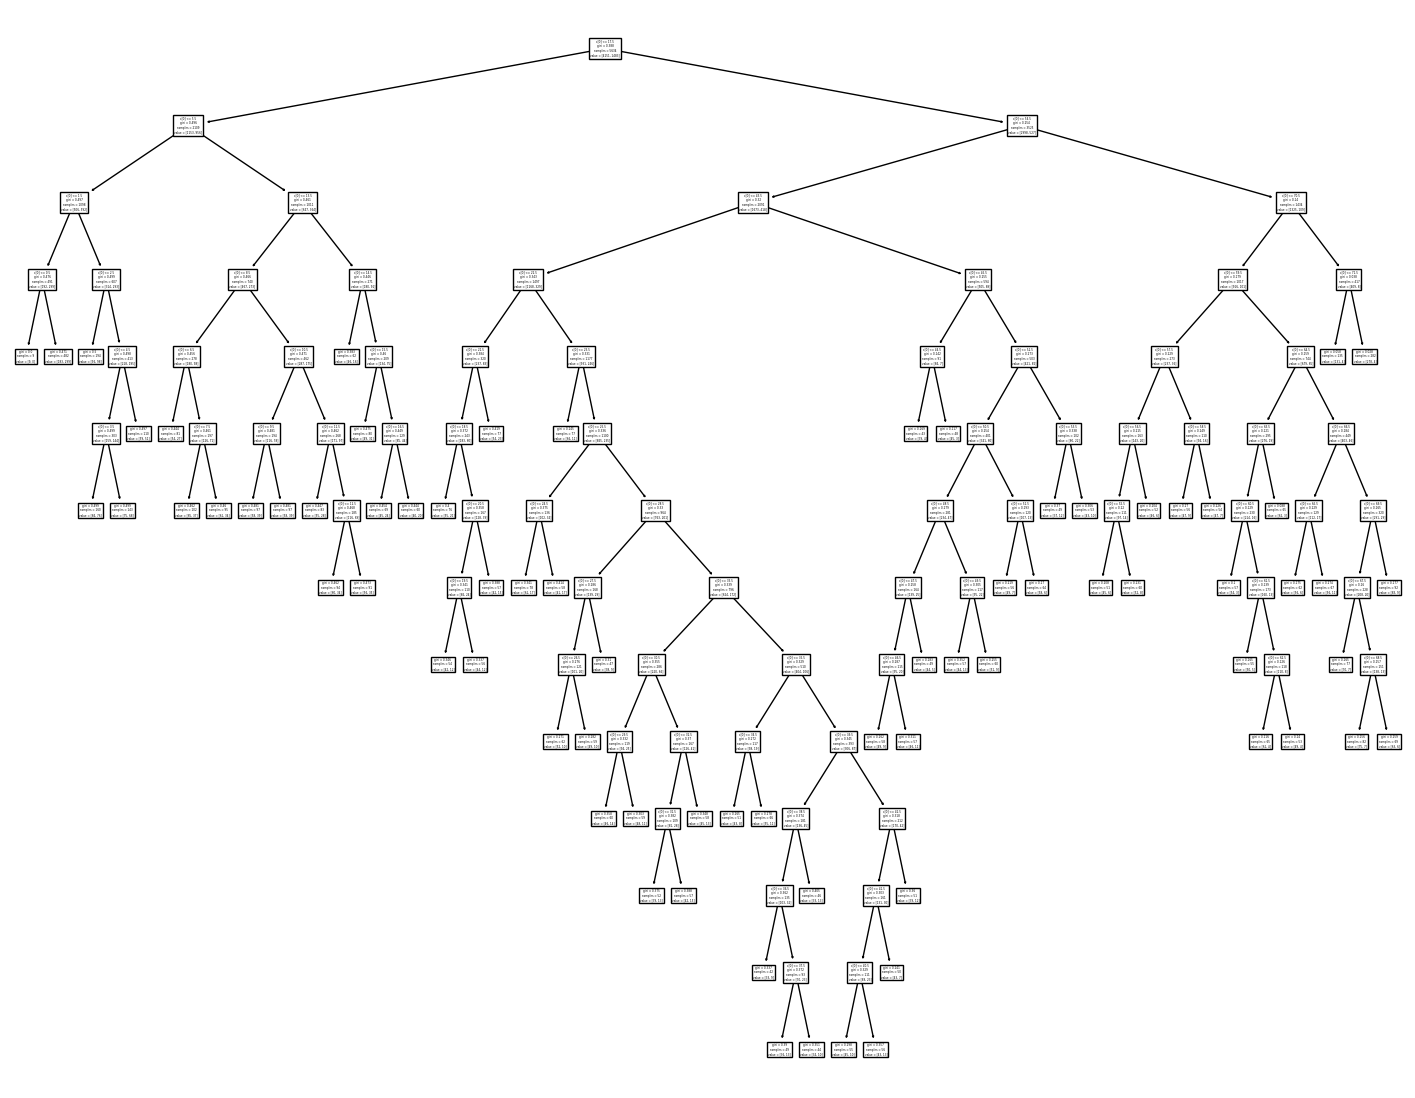

In [437]:
plt.figure(figsize = (18,14))
plot_tree(dt)
plt.show()

In [445]:
#hyper paramerter tuning
params = {'max_depth':[None,4,5,10],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3],
    'random_state':[21]   
}
grid_search = GridSearchCV(dt,param_grid=params,cv=5,scoring='accuracy')
grid_search.fit(X_train_dt,y_train_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4], 'random_state': [21]},
             scoring='accuracy')

In [446]:
grid_search.best_params_
# These are the default parameters.

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 21}

# RANDOM FOREST

In [451]:
# Build a Random Forest model where dependent variable is ‘Churn’ and
#independent variables are ‘tenure’ and ‘MonthlyCharges’:
#a. Divide the dataset in 70:30 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and calculate the accuracy

In [474]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_sample_weight

In [475]:
df_log.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,0
1,34,56.95,0
2,2,53.85,1
3,45,42.30,0
4,2,70.70,1


In [469]:
X_rf = df_log[['tenure', 'MonthlyCharges']]
y_rf = df_log['Churn']
y = [0,1]

In [470]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X_rf,y_rf,test_size=0.3,random_state=25)

In [483]:
# In Random forest we can handle imbalace data with class weight
weights = compute_sample_weight(class_weight='balanced', y=y_train_rf)

In [484]:
rf = RandomForestClassifier(random_state=25)

In [485]:
rf.fit(X_train_rf,y_train_rf,sample_weight=weights)

RandomForestClassifier(random_state=25)

In [486]:
y_test_rf_predict = rf.predict(X_test_rf)

In [488]:
print(classification_report(y_test_rf,y_test_rf_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1542
           1       0.56      0.47      0.51       571

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.67      2113
weighted avg       0.75      0.76      0.75      2113



In [492]:
y_train_rf_predict = rf.predict(X_train_rf)

In [494]:
print(classification_report(y_train_rf,y_train_rf_predict))#clear overfitting

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3632
           1       0.94      0.99      0.96      1298

    accuracy                           0.98      4930
   macro avg       0.97      0.98      0.98      4930
weighted avg       0.98      0.98      0.98      4930



In [518]:
#Hyperparameter Tunning to remove overfitting

params = {'max_depth':[None,4,5,6,7],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[26]   
}
grid_search = GridSearchCV(rf,param_grid=params,cv=5,scoring='accuracy')
grid_search.fit(X_train_rf,y_train_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'max_depth': [None, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4], 'random_state': [26]},
             scoring='accuracy')

In [519]:
best_param = grid_search.best_params_
best_param

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 26}

In [521]:
rf_best = RandomForestClassifier(n_estimators=1000,** best_param)

In [522]:
rf_best.fit(X_train_rf,y_train_rf,sample_weight=weights)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=1000,
                       random_state=26)

In [523]:
y_rf_predict = rf_best.predict(X_test_rf)

In [524]:
print(classification_report(y_test_rf,y_rf_predict))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1542
           1       0.52      0.73      0.61       571

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



In [525]:
y_train_predict = rf_best.predict(X_train_rf)

In [526]:
print(classification_report(y_train_rf,y_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      3632
           1       0.52      0.75      0.61      1298

    accuracy                           0.75      4930
   macro avg       0.70      0.75      0.71      4930
weighted avg       0.79      0.75      0.76      4930



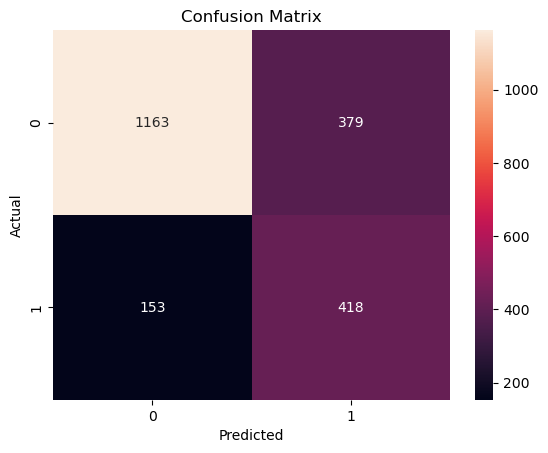

In [527]:
#confusion matrix
cm = confusion_matrix(y_test_rf,y_rf_predict)
sns.heatmap(cm,annot=True,fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()